In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mpg = sns.load_dataset('mpg')

def histogram_boxplot(data, feature, figsize = (12, 7), kde = True, bins = None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex = True,
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "lightgrey"
    )
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )
    ax_hist2.axvline(
        data[feature].median(), color = "red", linestyle = "-"
    )


In [ ]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


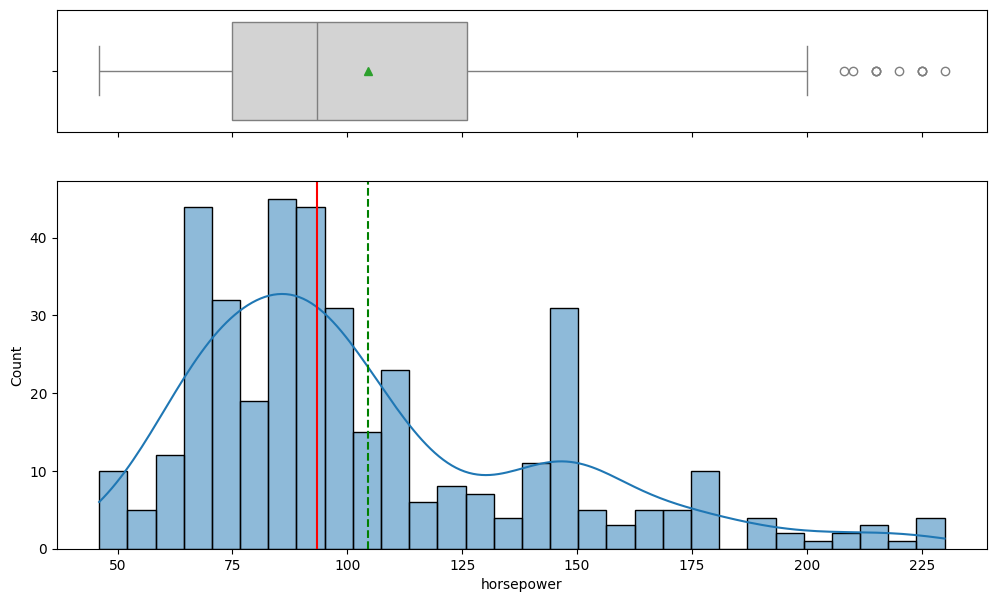

In [ ]:
histogram_boxplot(mpg, 'horsepower', bins = 30)

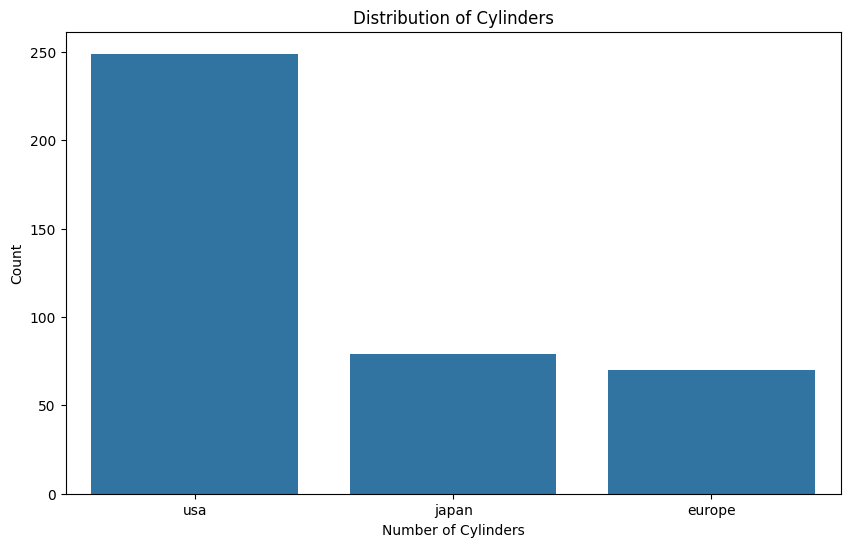

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=mpg['origin'])
plt.title('Distribution of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.show()

In [ ]:
mpg.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


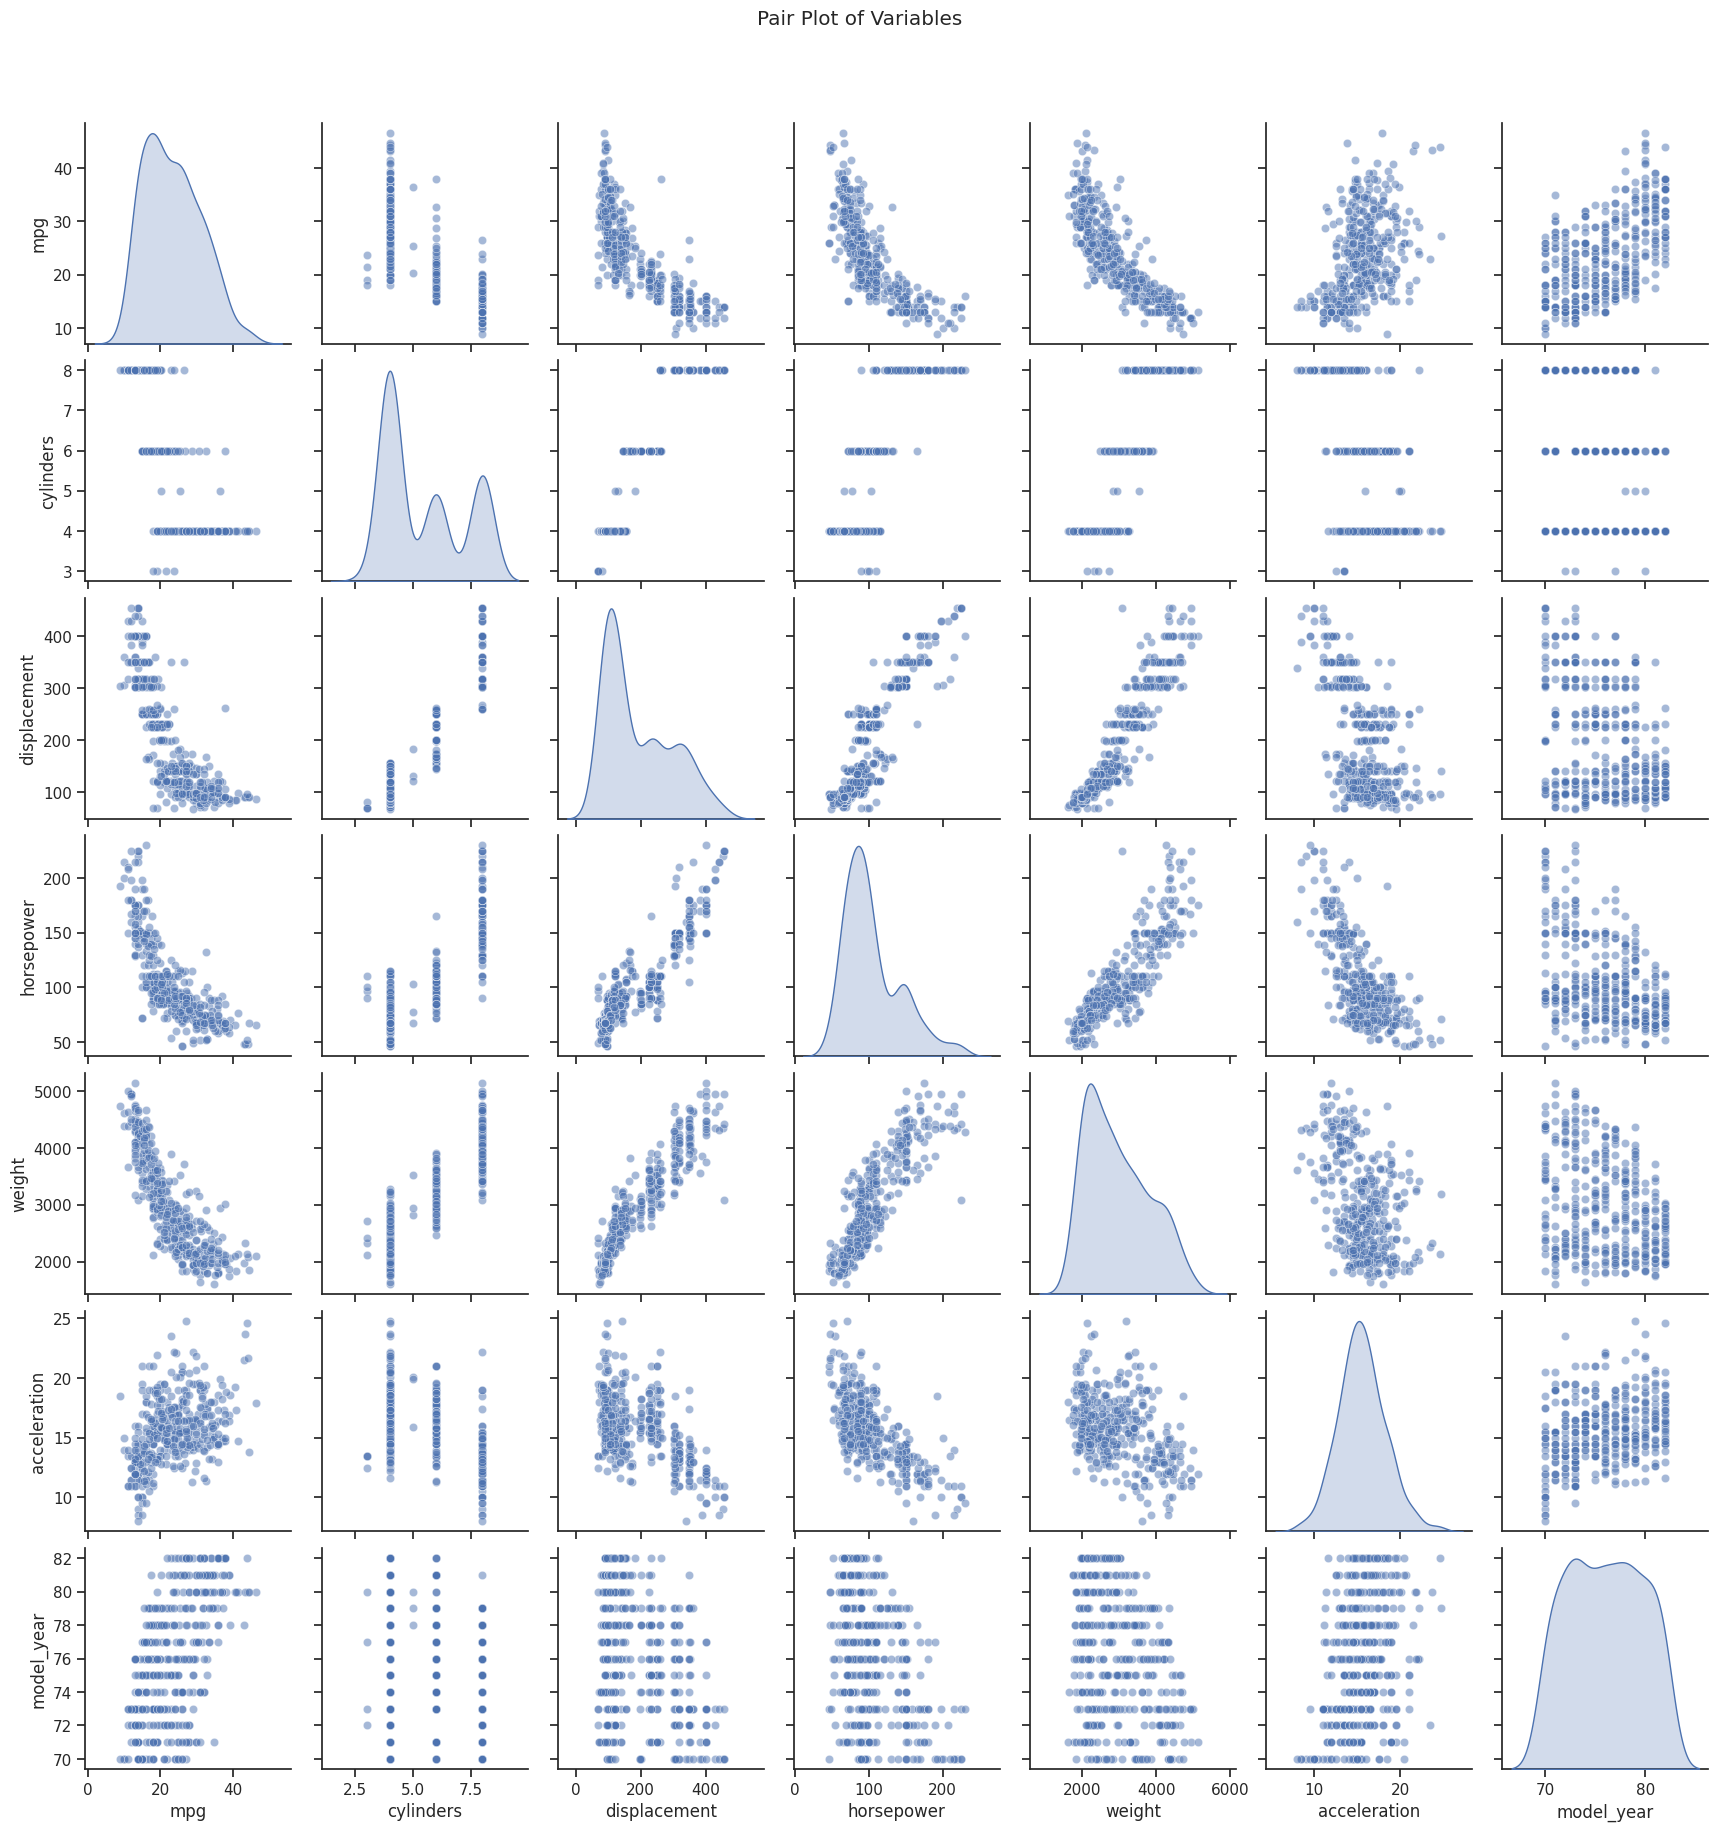

In [ ]:
sns.set(style = "ticks", color_codes = True)
pair_plot = sns.pairplot(mpg, diag_kind='kde', plot_kws={'alpha': 0.5})
pair_plot.fig.suptitle('Pair Plot of Variables', y = 1.05)
plt.show()

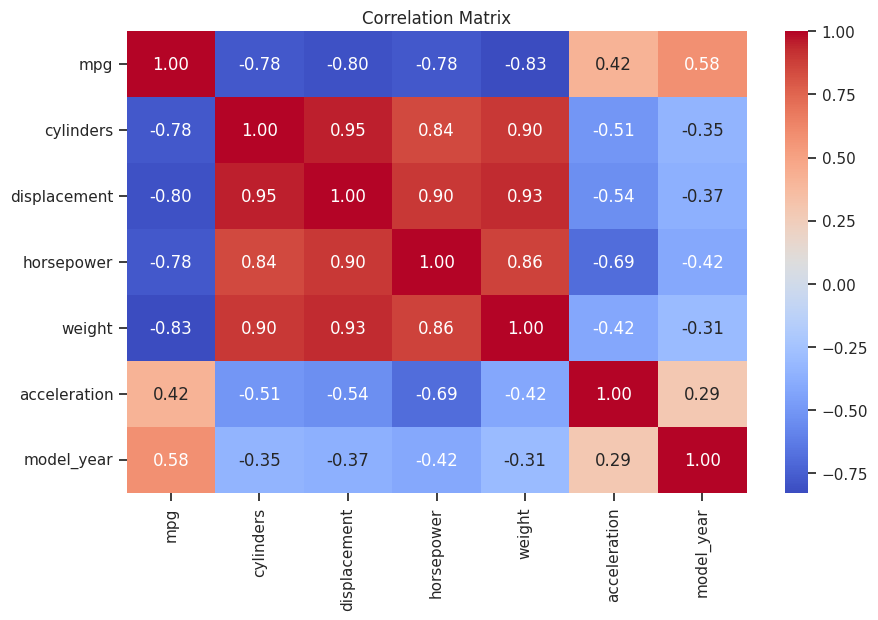

In [ ]:
correlation_matrix = mpg.select_dtypes(include = ['float64', 'int64']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

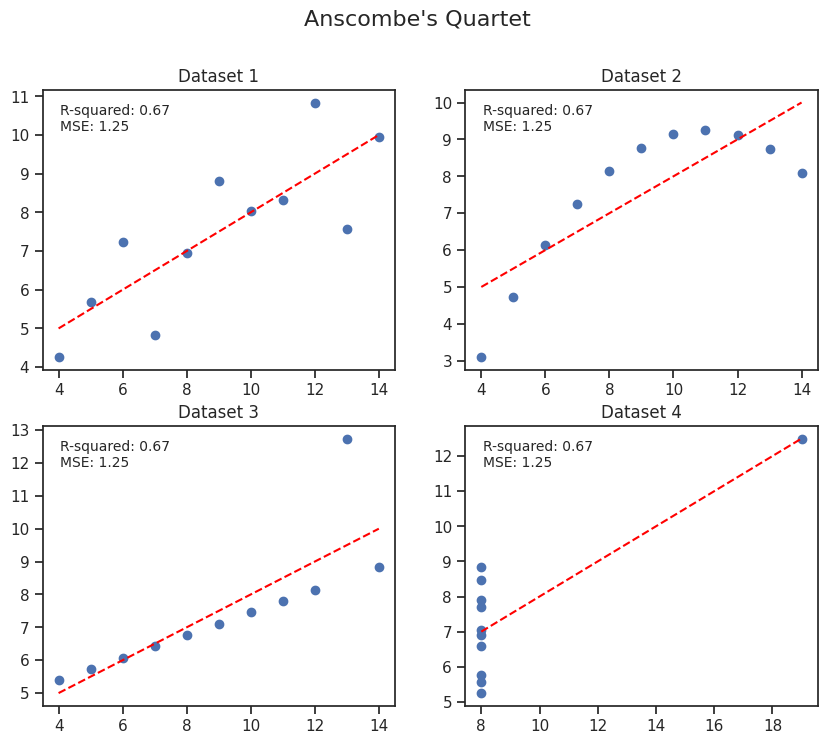

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

anscombe = sns.load_dataset("anscombe")
dataset1 = anscombe[anscombe["dataset"] == "I"]
dataset2 = anscombe[anscombe["dataset"] == "II"]
dataset3 = anscombe[anscombe["dataset"] == "III"]
dataset4 = anscombe[anscombe["dataset"] == "IV"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, dataset in enumerate([dataset1, dataset2, dataset3, dataset4]):

    axes[i // 2, i % 2].scatter(dataset["x"], dataset["y"])

    x = np.array([dataset["x"].min(), dataset["x"].max()])
    y = np.poly1d(np.polyfit(dataset["x"], dataset["y"], 1))(x)
    axes[i // 2, i % 2].plot(x, y, color='red', linestyle='--')

    r_squared = r2_score(dataset["y"], np.poly1d(np.polyfit(dataset["x"], dataset["y"], 1))(dataset["x"]))

    mse = mean_squared_error(dataset["y"], np.poly1d(np.polyfit(dataset["x"], dataset["y"], 1))(dataset["x"]))

    axes[i // 2, i % 2].text(0.05, 0.95, f'R-squared: {r_squared:.2f}\nMSE: {mse:.2f}',
                             transform=axes[i // 2, i % 2].transAxes, fontsize=10,
                             verticalalignment='top')

    axes[i // 2, i % 2].set_title(f'Dataset {i+1}')

plt.suptitle("Anscombe's Quartet", fontsize=16)
plt.show()